#Regressão logística
Como vocês viram na aula, a regressão logística serve para resolver problemas de classificação.
Vamos exemplificar para o conjunto de dados "Fontes dos Dados", que você já conhece.

Passo 1: Leitura do dataset.
Estamos utilizando a opção 

```
pd.set_option('display.max_columns',None)
```
que você já viu na aula de estatística.



In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_excel('Fonte dos Dados.xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


Como a regressão logística trabalha com dados binários, vamos construir uma coluna categórica. 
Nossa proposta vai ser configurar a Taxa de Urbanização ser maior que 65%. Se sim, a coluna receberá o valor 1, senão, receberá o valor 0.
Isso pode ser feito como vocês fizeram na aula de estatística, ou também com o comando a seguir:

In [3]:
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [4]:
df["Taxa de Urbanização"]>65

0       False
1        True
2        True
3       False
4       False
        ...  
5560     True
5561    False
5562    False
5563    False
5564     True
Name: Taxa de Urbanização, Length: 5565, dtype: bool

In [5]:
#opção
df["Urbanização Categórica"] = df["Taxa de Urbanização"]>65

In [6]:
df[["Taxa de Urbanização","Urbanização Categórica"]].head()

,Taxa de Urbanização,Urbanização Categórica
0,48.34,False
1,65.30,True
2,70.02,True
3,44.07,False
4,44.60,False


In [7]:
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Urbanização Categórica
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0,False
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0,True
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0,True
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0,False
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0,False


In [8]:
def criar_dados_categoricos(df, coluna, limite):
  '''
  Função que recebe uma coluna, um limite e transforma a coluna em dados binários.
  '''
  cat = []
  for valor in df[coluna]:
    if valor<limite:
      cat.append(0)
    else:
      cat.append(1)
  return cat

In [9]:
df["Urbanização Categórica"] = criar_dados_categoricos(df, 'Taxa de Urbanização',65)

Nosso modelo vai querer predizer o valor da Urbanização categórica.

Ainda na linha do que aprendemos em estatística, vamos avaliar as correlações dessa matriz, para selecionar nossas variáveis preditoras. Essas variáveis precisam ser numéricas.

C:\Users\99769242\AppData\Local\Temp\ipykernel_24744\1840439051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


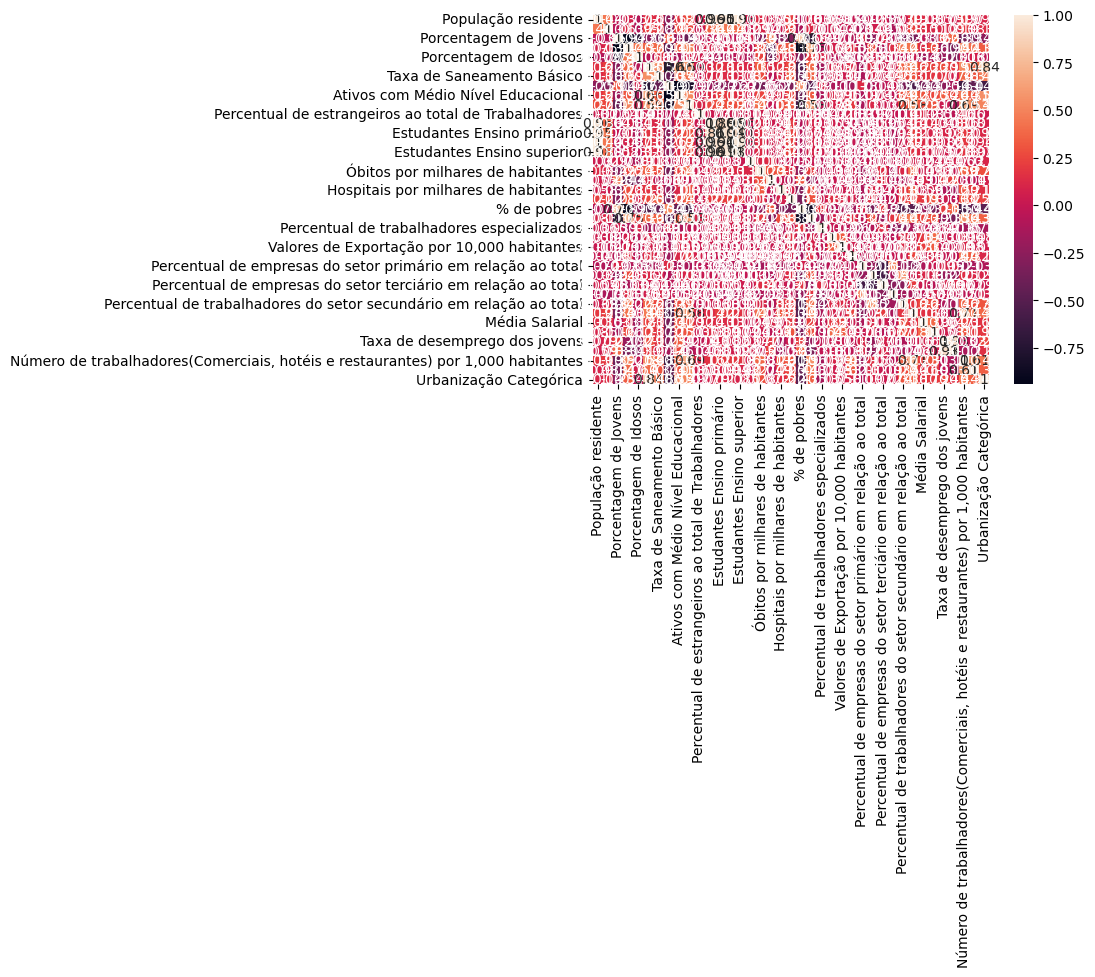

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

Como a matriz de correlação é difícil de associar, podemos ordenar, dessa matriz, as variáveis que mais se correlacionam com a urbanização categórica.

In [11]:
df.corr()["Urbanização Categórica"].sort_values()

C:\Users\99769242\AppData\Local\Temp\ipykernel_24744\1830286415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Urbanização Categórica"].sort_values()


Ativos com Baixo Nível Educacional                                                -0.602380
% de pobres                                                                       -0.473331
Porcentagem de Jovens                                                             -0.246844
Percentual de trabalhadores especializados                                        -0.133848
Percentual de empresas do setor primário em relação ao total                      -0.104736
Porcentagem de Idosos                                                             -0.031293
Percentual de empresas do setor terciário em relação ao total                      0.022361
Percentual de estrangeiros ao total de Trabalhadores                               0.027365
Valores de Importação por 10,000 habitantes                                        0.054632
Valores de Exportação por 10,000 habitantes                                        0.057738
Nascidos por milhares de habitantes                                             

In [12]:
import numpy as np
np.abs(-1)

1

In [13]:
correlacao = df.corr() #criando uma matriz de correlação
correlacao_filtrada = correlacao[correlacao["Urbanização Categórica"].abs()>0.3]["Urbanização Categórica"]
correlacao_filtrada

C:\Users\99769242\AppData\Local\Temp\ipykernel_24744\2600391476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr() #criando uma matriz de correlação


Porcentagem de Ativos                                                              0.336378
Taxa de Urbanização                                                                0.844765
Taxa de Saneamento Básico                                                          0.476591
Ativos com Baixo Nível Educacional                                                -0.602380
Ativos com Médio Nível Educacional                                                 0.550358
Ativos com Alto Nível Educacional                                                  0.494503
% de pobres                                                                       -0.473331
IDH                                                                                0.350436
Percentual de trabalhadores do setor secundário em relação ao total                0.306522
Percentual de trabalhadores do setor terciário em relação ao total                 0.378543
Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes 

In [14]:
correlacao_filtrada.index

Index(['Porcentagem de Ativos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'Ativos com Baixo Nível Educacional',
       'Ativos com Médio Nível Educacional',
       'Ativos com Alto Nível Educacional', '% de pobres', 'IDH',
       'Percentual de trabalhadores do setor secundário em relação ao total',
       'Percentual de trabalhadores do setor terciário em relação ao total',
       'Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes',
       'Número de ativos culturais e de lazer por 10,000 habitantes',
       'Urbanização Categórica'],
      dtype='object')

Agora vamos selecionar apenas as colunas que vamos trabalhar neste dataframe.

In [15]:
df = df[correlacao_filtrada.index] #seleção das variáveis de interesse.

In [16]:
X = df.drop(["Urbanização Categórica","Taxa de Urbanização"],axis=1)
y = df["Urbanização Categórica"]

Agora vamos separar nossa base entre base de treinamento e de teste.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=10000)

In [19]:
modelo.fit(X_train, y_train)#ajustando o modelo com os dados de treinamento

LogisticRegression(max_iter=10000)

In [20]:
predicao_modelo = modelo.predict(X_test)

In [21]:
y_test

626     0
4743    1
3047    0
3199    0
4037    1
       ..
650     1
4457    0
708     0
3332    1
5022    1
Name: Urbanização Categórica, Length: 1670, dtype: int64

In [22]:
predicao_modelo

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicao_modelo)

0.8281437125748503

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

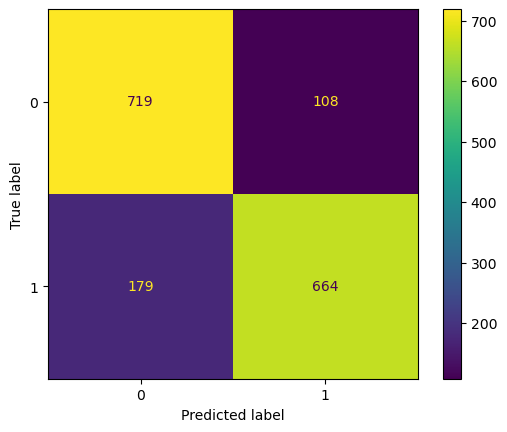

In [25]:
cm = confusion_matrix(y_test, predicao_modelo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();